<a href="https://colab.research.google.com/github/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/blob/main/Data_Collection_From_Twitter_with_Textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweet-preprocessor==0.6.0
!pip install tweepy==4.10.1
!pip install textblob==0.15.3
!pip install wordcloud==1.8.2.2
!pip install nltk==3.7
!pip install googletrans==4.0.0-rc1
!pip install PySastrawi==1.2.0

In [2]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import re
import string 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Masukkan twitter token API
api_key = "UcVNXqPP4r4k10isPrN8Vv50J"
api_key_secret = "i7FyAvlWmVFaSE2ilPTnj51xKdZeh767exQ8ICHWJutUERntTk"
access_token = "907513785979592704-Dl1e8GTKqSZU6hAncjP6neOv2IZRpx1"
access_token_secret ="dC2BpeRVlgBQ7hWPt4hZjm9tSs0aB5DOd5doE3gEG9y9W"

# #Masukkan twitter token API
# api_key = "GbIGEYyXJW8RtX0KBxtzjNFWb"
# api_key_secret = "q47qwDYnsI9I6LAbifsQq5xULG4gYmiaOXD6iZZIjdKeNLXPT5"
# access_token = "847732131132358656-yvElNA1Ml5KM19Khl3CMNiMkb7Knk1Y"
# access_token_secret ="17KXZyRBfXmDK8UfsMozBnt3RP2C5vA8Rt8vA5rFHoUHY"

In [4]:
auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
def scraptweets(search_words, date_since, date_until,  numTweets):

    db_tweets = pd.DataFrame(columns=['tweetcreatedts', 'username', 'tweet', 'source'])

    tweets = tweepy.Cursor(
                    api.search_tweets, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(numTweets)

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at
        id_tweet = tweet.user.id
        source = tweet.source
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        ith_tweet = [tweetcreatedts, username, text, source]

        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'Data-hasil-crawling.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(30)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "ikn -filter:retweets"
date_since = last_week
date_until = today
numTweets = 50

scraptweets(search_words, date_since, date_until, numTweets)

Proses Scrapping Selesai Dengan Jumlah Data 50


In [6]:
tweets = pd.read_csv('Data-hasil-crawling.csv')
tweets

,tweetcreatedts,username,tweet,source
0,2023-03-02 23:58:26+00:00,febrianykatrina,@rezaparadianan1 IKN Nusantara berikan dampak ...,Botbird tweets
1,2023-03-02 23:58:26+00:00,sindiaulianii,@febrianykatrina Sukseskan IKN jadi pusat ekon...,Botbird tweets
2,2023-03-02 23:58:16+00:00,rezaparadianan1,@febrianykatrina Dukung IKN Akan Meningkatkan ...,Botbird tweets
3,2023-03-02 23:56:32+00:00,unyiilz,@kelixman sudah adaa proposal perumahan IKN. t...,Twitter for iPhone
4,2023-03-02 23:56:15+00:00,annenurjanah,Dear Pak @jokowi kami bersyukur jd ASN tp tia...,Twitter for Android
5,2023-03-02 23:52:56+00:00,yudimemet,@Muhammad_Saewad Intinya bukan masalah menerus...,Twitter for Android
6,2023-03-02 23:52:40+00:00,harie_mhd,"@Muhammad_Saewad Koreksi jika salah, saya pern...",Twitter Web App
7,2023-03-02 23:51:42+00:00,ranggaabdinni,"@geloraco Gak mungkin an1s melanjutkan IKN, wo...",Twitter for iPhone
8,2023-03-02 23:51:29+00:00,saefula47552261,@CNNIndonesia Lebih bagus IKN gak usah pindah,Twitter for Android
9,2023-03-02 23:51:11+00:00,DIDE104,@Muhammad_Saewad wad memang tujuan ikn bukan t...,Twitter for Android


In [7]:
tweets = tweets.reset_index(drop=True).drop_duplicates(subset='tweet', keep="last", ignore_index=True)

In [8]:
# Some functions for preprocessing text
def cleaningText(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # remove mentions
    tweet = re.sub(r'#[A-Za-z0-9]+', '', tweet) # remove hashtag
    tweet = re.sub(r'RT[\s]', '', tweet) # remove RT
    tweet = re.sub(r"http\S+", '', tweet) # remove link
    tweet = re.sub(r'[0-9]+', '', tweet) # remove numbers
    tweet = tweet.replace('\n', ' ') # replace new line into space
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    tweet = tweet.strip(' ') # remove characters space from both left and right text
    return tweet

In [9]:
def casefoldingText(tweet): # Converting all the characters in a text into lower case
    tweet = tweet.lower() 
    return tweet

In [10]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/main/Dataset/kamus-slang-ind.csv', encoding='ISO-8859-1')
def text_normalize(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in tweet.split()
    ])
    return tweet

In [11]:
stopwords_ind = stopwords.words('indonesian')
more_stopword = ['terusmajubersamaprabowo', 'mendingprabowo', 'prabowopresiden', 'prabowopersatuanindonesia', 'prabowosubianto']
stopwords_ind = stopwords_ind + more_stopword
def filteringText(tweet):
    clean_words = []
    tweet = tweet.split()
    for word in tweet:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [12]:
def stemmingText(tweet):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = stemmer.stem(tweet)
    return tweet

In [13]:
# Preprocessing tweets data
tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets['text_clean'] = tweets['tweet'].apply(text_normalize)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_clean'] = tweets['text_clean'].apply(filteringText)
tweets['text_clean'] = tweets['text_clean'].apply(stemmingText)

In [14]:
def preprocessing_tweets(x):
    return p.clean(x)

def tokenize_tweets(x):
    return p.tokenize(x)

tweets['tweet_clean'] = tweets['text_clean'].apply(preprocessing_tweets)
tweets['tweet_clean'] = tweets['tweet_clean'].apply(tokenize_tweets)

In [25]:
tweets

,tweetcreatedts,username,source,text_clean,tweet_clean,tweet_english,klasifikasi
0,2023-03-02 23:58:26+00:00,febrianykatrina,Botbird tweets,rezaparadianan1 ikn nusantara dampak positif k...,rezaparadianan1 ikn nusantara dampak positif k...,rezaparadianan1 ikn nusantara positive impact ...,positif
1,2023-03-02 23:58:26+00:00,sindiaulianii,Botbird tweets,febrianykatrina sukses ikn pusat ekonomi indon...,febrianykatrina sukses ikn pusat ekonomi indon...,febrianykatrina success ikn economic center of...,positif
2,2023-03-02 23:58:16+00:00,rezaparadianan1,Botbird tweets,febrianykatrina dukung ikn akan tingkat ekonom...,febrianykatrina dukung ikn akan tingkat ekonom...,febrianykatrina supports ikn for the economic ...,positif
3,2023-03-02 23:56:32+00:00,unyiilz,Twitter for iPhone,kelixman proposal rumah ikn negara jangan dulu...,kelixman proposal rumah ikn negara jangan dulu...,kelixman proposal house ikn negara don't be ch...,positif
4,2023-03-02 23:56:15+00:00,annenurjanah,Twitter for Android,dear pak jokowi syukur asn hari jalan subuh la...,dear pak jokowi syukur asn hari jalan subuh la...,"dear mr. jokowi, thanksgiving asn the day of t...",positif
5,2023-03-02 23:52:56+00:00,yudimemet,Twitter for Android,muhammad saewad inti terus ikn takut tahu kerj...,muhammad saewad inti terus ikn takut tahu kerj...,muhammad saewad inti continues to be afraid of...,negatif
6,2023-03-02 23:52:40+00:00,harie_mhd,Twitter Web App,muhammad saewad koreksi salah baca jokowi ikn ...,muhammad saewad koreksi salah baca jokowi ikn ...,muhammad saewad correcting wrong read jokowi i...,negatif
7,2023-03-02 23:51:42+00:00,ranggaabdinni,Twitter for iPhone,geloraco gak an1s lanjut ikn orang program jok...,geloraco gak an1s lanjut ikn orang program jok...,geloraco not an1s continued ikn people of the ...,negatif
8,2023-03-02 23:51:29+00:00,saefula47552261,Twitter for Android,cnnindonesia lebih bagus ikn pindah,cnnindonesia lebih bagus ikn pindah,cnnindonesia is better ikn mov,positif
9,2023-03-02 23:51:11+00:00,DIDE104,Twitter for Android,muhammad saewad tuju ikn kadrun mending saran ...,muhammad saewad tuju ikn kadrun mending saran ...,muhammad saewad waited ikn kadrun mending sugg...,negatif


In [15]:
# Kalau time out ubah variabel translate
from googletrans import Translator
translator = Translator()

def convert_eng(tweet):
    return translator.translate(tweet, dest='en').text

tweets['tweet_english'] = tweets['tweet_clean'].apply(convert_eng)

In [16]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

tweets['tweet_english'] = tweets['tweet_english'].apply(stemming_data)

In [17]:
data_tweet = list(tweets['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'positif'
    else:
        return 'negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('positif')
    else:
        total_negatif += 1
        status.append('negatif')

    total += 1 

status = pd.DataFrame({'klasifikasi': status})
tweets['klasifikasi'] = status
tweets.tail()

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 33
Negatif = 17

Total Data : 50


In [18]:
# data_tweet = list(data['tweet_english'])
# polaritas = 0

# status = []
# total_positif = total_negatif = total_netral = total = 0

# def klasifikasi(polaritas):
#     if polaritas > 0.0:
#         return 'Positif'
#     elif polaritas > 0.0 == 0.0:
#         return 'Netral'
#     else:
#         return 'Negatif'

# for i, tweet in enumerate(data_tweet):
#     analysis = TextBlob(tweet)
#     polaritas += analysis.polarity

#     if analysis.sentiment.polarity > 0.0:
#         total_positif += 1
#         status.append('Positif')
#     elif analysis.sentiment.polarity == 0.0:
#         total_netral += 1
#         status.append('Netral')
#     else:
#         total_negatif += 1
#         status.append('Negatif')

#     total += 1 

# status = pd.DataFrame({'klasifikasi': status})
# data['klasifikasi'] = status
# data.tail()

# print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
# print(f'\nTotal Data : {total}')

In [19]:
tweets.to_excel('Data-hasil-klasifikasi.xlsx', index=False)

In [20]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

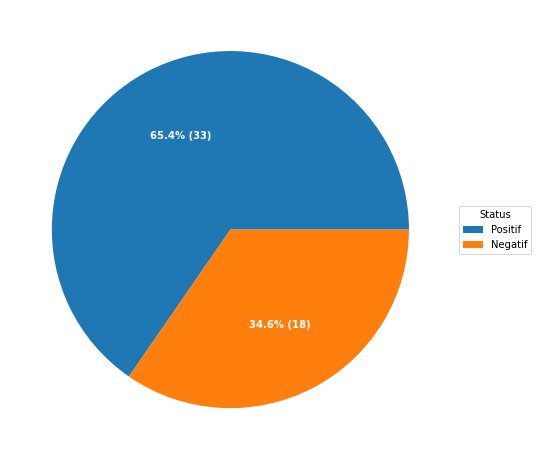

In [21]:
label = ['Positif', 'Negatif']
count_data = [total_positif+1, total_negatif+1]
show_pie(label, count_data, "Status")

In [22]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

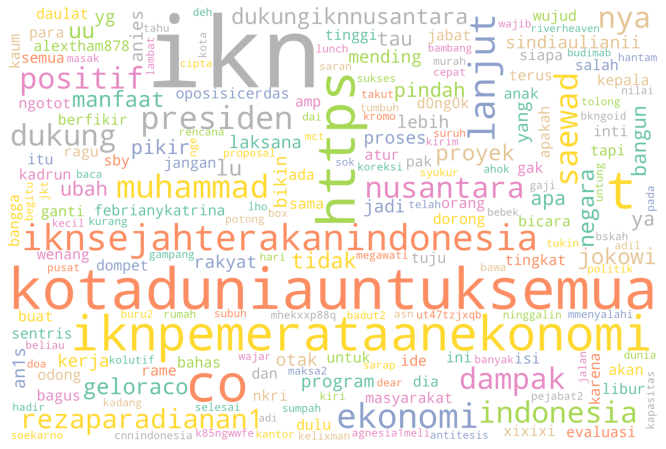

In [23]:
all_words = ' '.join([tweets for tweets in tweets['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

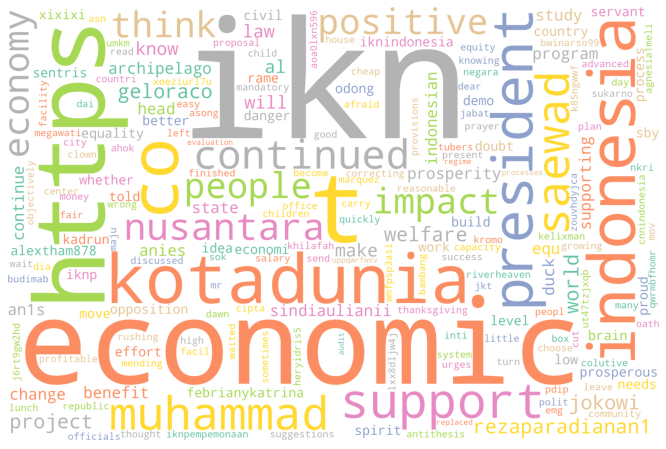

In [24]:
all_words = ' '.join([tweets for tweets in tweets['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)